# Feature importance (оценка важности признаков)

In [49]:
import pandas as pd  # работа с табличными данными
import numpy as np # работа с математикой

from sklearn.model_selection import train_test_split # разделение на тестовую и тренировочную выборки
from sklearn.preprocessing import StandardScaler # нормализация данных по стандартному отклонению
from sklearn import datasets # тестовые датасеты

from sklearn.ensemble import RandomForestClassifier # Классификатор случайного леса

In [ ]:
import matplotlib
import matplotlib.pyplot as plt # визуализация данных
plt.rcParams["figure.figsize"] = (10,5) # размер графиков

plt.style.use('fivethirtyeight') # стиль графиков

In [50]:
wine = datasets.load_wine()
df = pd.DataFrame(wine.data)
df[13] = wine.target # целевая переменная
df.columns = ['alcohal', 'malic_acid', 'ash', 'ash_alcalinity', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoids_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od_dilutedwines', 'proline', 'class']

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1:], test_size = 0.3, random_state=1)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

cols = ['alcohal', 'malic_acid', 'ash', 'ash_alcalinity', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoids_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od_dilutedwines', 'proline']
X_train_std = pd.DataFrame(X_train_std, columns=cols)
X_test_std = pd.DataFrame(X_test_std, columns=cols)

In [51]:
df

,alcohal,malic_acid,ash,ash_alcalinity,magnesium,total_phenols,flavanoids,nonflavanoids_phenols,proanthocyanins,color_intensity,hue,od_dilutedwines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [52]:
y_train.values.ravel() #Series -> numpy array с помощью ravel

array([1, 1, 0, 1, 2, 1, 1, 0, 2, 1, 2, 0, 1, 0, 1, 0, 2, 2, 2, 2, 1, 1,
       0, 2, 0, 1, 2, 0, 1, 0, 2, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1,
       1, 1, 0, 0, 0, 2, 0, 1, 2, 2, 0, 1, 0, 1, 1, 0, 2, 1, 1, 2, 2, 1,
       1, 1, 2, 2, 1, 0, 1, 0, 2, 1, 1, 0, 0, 1, 0, 0, 0, 2, 0, 2, 2, 0,
       1, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 0, 2, 2, 1, 1, 1, 0, 2, 2, 2, 2,
       2, 1, 0, 0, 2, 1, 1, 2, 1, 2, 2, 1, 2, 0])

In [53]:
forest = RandomForestClassifier(n_estimators=500,
                                random_state=1)

forest.fit(X_train_std, y_train.values.ravel())

RandomForestClassifier(n_estimators=500, random_state=1)

In [54]:
importances = forest.feature_importances_ # важности признаков из объекта Random Forest.

sorted_indices = np.argsort(importances)[::-1]

feat_labels = df.columns[1:]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))

 1) class                          0.178209
 2) nonflavanoids_phenols          0.170896
 3) hue                            0.130607
 4) proline                        0.118767
 5) malic_acid                     0.108576
 6) od_dilutedwines                0.089635
 7) flavanoids                     0.056197
 8) ash                            0.039554
 9) total_phenols                  0.037642
10) magnesium                      0.024482
11) color_intensity                0.017584
12) ash_alcalinity                 0.016286
13) proanthocyanins                0.011564


In [55]:
importances[sorted_indices]

array([0.17820877, 0.17089599, 0.13060723, 0.11876717, 0.1085762 ,
       0.0896346 , 0.05619705, 0.03955423, 0.03764244, 0.02448229,
       0.01758401, 0.01628649, 0.01156354])

In [59]:
X_train.shape[1]

13

In [60]:
importances[sorted_indices]

array([0.17820877, 0.17089599, 0.13060723, 0.11876717, 0.1085762 ,
       0.0896346 , 0.05619705, 0.03955423, 0.03764244, 0.02448229,
       0.01758401, 0.01628649, 0.01156354])

In [61]:
X_train.columns[sorted_indices]

Index(['proline', 'flavanoids', 'color_intensity', 'od_dilutedwines',
       'alcohal', 'hue', 'total_phenols', 'malic_acid', 'magnesium',
       'ash_alcalinity', 'proanthocyanins', 'ash', 'nonflavanoids_phenols'],
      dtype='object')

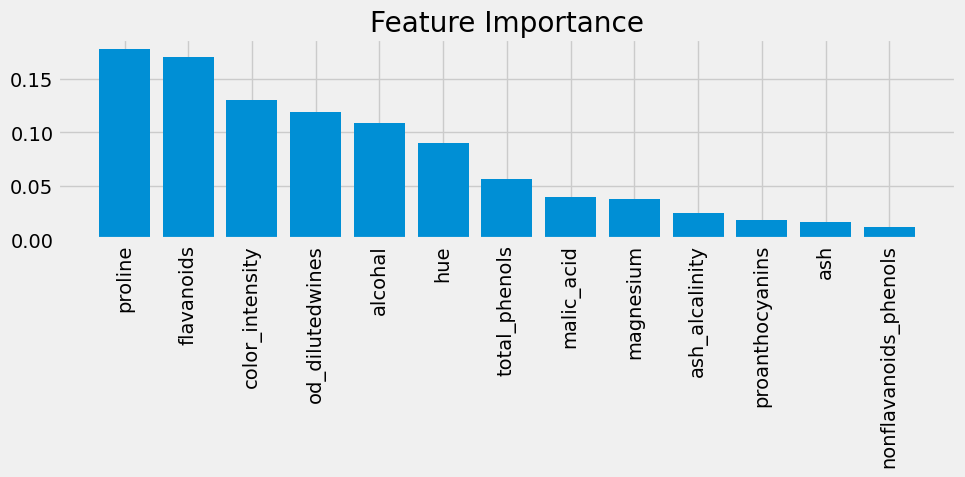

In [57]:
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

# Permutation importance (интерпретируемость признаков)

Permutation importance - это техника оценки важности признаков в машинном обучении. Она основана на идее о том, что если мы случайно перемешаем значения одного признака, то это должно повлиять на точность модели. Вот подробное объяснение этой концепции:

**Основная идея**

Permutation importance работает следующим образом:

* Оценить производительность модели на исходных данных.
* Случайным образом поменять порядок значений одного признака.
* Повторно оценить производительность модели на этих измененных данных.
* Вычислить разницу между двумя оценками производительности.

**Алгоритм**

1. Для каждого признака:

* Создайте копию данных с этим признаком.
* Случайным образом переставьте значения этого признака.
* Оцените производительность модели на этих измененных данных.
* Вычислите разницу между исходной и новой оценкой производительности.
2. Повторите этот процесс для всех признаков.
3. Признак с наибольшим значением разницы будет считаться наиболее важным

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # метрики классификации
import random # случайное значение
import progressbar # отображение прогресса работы функции
from google.colab import files # скачать файлы


In [32]:
!gdown 1H4gFlekHK3u4wXd0K4k8CJ90ulvYMHDM
# https://drive.google.com/file/d/1H4gFlekHK3u4wXd0K4k8CJ90ulvYMHDM/view?usp=sharing

Downloading...
From: https://drive.google.com/uc?id=1H4gFlekHK3u4wXd0K4k8CJ90ulvYMHDM
To: /content/UCI_Credit_Card.csv
100% 2.86M/2.86M [00:00<00:00, 160MB/s]


In [33]:
credit=pd.read_csv('/content/UCI_Credit_Card.csv').drop(columns=['ID'])

In [34]:
credit.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [35]:
credit.isnull().sum()

,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_0,0
PAY_2,0
PAY_3,0
PAY_4,0
PAY_5,0


In [5]:
credit.dropna(inplace=True) # удалить пропуски

In [37]:
credit.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [38]:
cats=['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'] #categorical columns
for c in cats:
    credit[c]=credit[c].astype('category')

credit_ohe=pd.get_dummies(credit, drop_first=True) #One-hot encoding the categorical variables

y=credit_ohe['default.payment.next.month']
X=credit_ohe.drop(columns=['default.payment.next.month'])

In [39]:
X.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_8,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,20000.0,24,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,...,False,False,False,False,False,False,False,False,False,False
1,120000.0,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,...,False,False,False,True,False,False,False,False,False,False
2,90000.0,34,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,...,False,False,True,False,False,False,False,False,False,False
3,50000.0,37,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,...,False,False,True,False,False,False,False,False,False,False
4,50000.0,57,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,...,False,False,True,False,False,False,False,False,False,False


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [41]:
rf=RandomForestClassifier(n_estimators=100)
model = rf.fit(X_train, y_train)

In [44]:
print('Оценим метриками:')
print('Accuracy (правильность):', accuracy_score(y_train, rf.predict(X_train)))
print('Precision (точность):', precision_score(y_train, rf.predict(X_train)))
print('Recall (полнота):', recall_score(y_train, rf.predict(X_train)))
print('F1:', f1_score(y_train, rf.predict(X_train)))
print('---------------')
print('Оценим метриками:')
print('Accuracy (правильность):', accuracy_score(y_test, rf.predict(X_test)))
print('Precision (точность):', precision_score(y_test, rf.predict(X_test)))
print('Recall (полнота):', recall_score(y_test, rf.predict(X_test)))
print('F1:', f1_score(y_test, rf.predict(X_test)))

Оценим метриками:
Accuracy (правильность): 0.9994222222222222
Precision (точность): 0.999597423510467
Recall (полнота): 0.9977898332328712
F1: 0.9986928104575163
---------------
Оценим метриками:
Accuracy (правильность): 0.8188
Precision (точность): 0.6533742331288344
Recall (полнота): 0.38517179023508136
F1: 0.484641638225256


In [45]:
col_sorted_by_importance=rf.feature_importances_.argsort()
feat_imp=pd.DataFrame({
    'cols':X.columns[col_sorted_by_importance],
    'imps':rf.feature_importances_[col_sorted_by_importance]
})

In [11]:
!pip install plotly_express --upgrade -q

In [46]:
import plotly_express as px # ображение графиков с наведением мышки
px.bar(feat_imp.sort_values(['imps'], ascending=False)[:25], x='cols', y='imps', labels={'cols':'column', 'imps':'feature importance'})

In [47]:
def PermImportance(X, y, clf, metric, num_iterations=100):
    '''
    Вычисляет важность (веса) интерпретируемости (перестановки) признаков в наборе данных.

    Входные данные:
    X: dataframe со всеми признаками
    y: массв numpy с классами target (классификация)
    clf: sklearn классификатор, тренированный на данных (до применения функции выполнить fit)
    metric: sklearn метрики, такие как accuracy_score, precision_score или recall_score
    num_iterations: число перестановок признаков

    Выходные данные:
    baseline: базовая метрика без изменения каких-либо столбцов
    scores: различия в первоначальных рассчетах и перестановках (изменениях) признаков, задаются в формате словаря {feature:[diffs]}
    '''
    bar=progressbar.ProgressBar(max_value=len(X.columns))
    baseline_metric=metric(y, clf.predict(X))
    scores={c:[] for c in X.columns}
    for c in X.columns:
        X1=X.copy(deep=True)
        for _ in range(num_iterations):
            temp=X1[c].tolist()
            random.shuffle(temp)
            X1[c]=temp
            score=metric(y, clf.predict(X1))
            scores[c].append(baseline_metric-score)
        bar.update(X.columns.tolist().index(c))
    return baseline_metric, scores

In [14]:
baseline, scores=PermImportance(X_test, y_test, rf, recall_score, num_iterations=10)

 98% (81 of 82) |####################### | Elapsed Time: 0:04:33 ETA:   0:00:02

In [15]:
percent_changes={c:[] for c in X.columns}
for c in scores:
    for i in range(len(scores[c])):
        percent_changes[c].append(scores[c][i]/baseline*100)

In [16]:
px.bar(
    pd.DataFrame.from_dict(percent_changes).melt().groupby(['variable']).mean().reset_index().sort_values(['value'], ascending=False)[:25],
    x='variable',
    y='value',
    labels={
        'variable':'column',
        'value':'% change in recall'
        }
       )